## 1. Face Emotion Classification with a three layer neural network

### a)

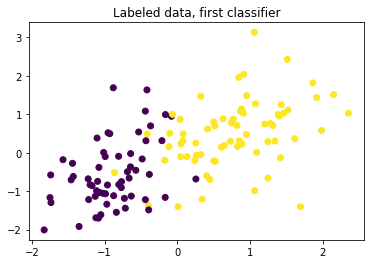

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
Xb = np.hstack((np.ones((n,1)), X))  # append a column of ones

# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=y.flatten())
plt.title('Labeled data, first classifier')
plt.show()

### b) 

After about 40 epochs, we see the frequency of 0% training error increase. As we progress past 40 epochs, there are a few classifiers that have a non-zero training error. This is due to the stochastic nature of our training algorithm and neural networks in general. Going beyond 100 epochs, there is still a small chance that a classifier will not have zero error. 


In [2]:
## Save errors
errors = np.zeros(100)
index = np.zeros(100)

## Train NN
q = np.shape(y)[1] #number of classification problems
M = 32 #number of hidden nodes

alpha = 0.05 #step size

def logsig(_x):
    return 1/(1+np.exp(-_x))
   
for j in range(100):
    ## initial weights
    V = np.random.randn(M+1, q); 
    W = np.random.randn(p+1, M);
    L = j #number of epochs
    index[j] = j
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
            
    ## Final predicted labels (on training data)
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(H@V)
    errors[j] = (np.sum(abs(np.round(Yhat[:,0])-y[:,0])))/y.size
    
print(errors)

[0.5390625 0.34375   0.4609375 0.140625  0.4609375 0.0390625 0.171875
 0.125     0.109375  0.0859375 0.0390625 0.1171875 0.046875  0.078125
 0.0390625 0.0703125 0.015625  0.0546875 0.046875  0.0703125 0.0625
 0.03125   0.0078125 0.5390625 0.0078125 0.5390625 0.0078125 0.015625
 0.0078125 0.0078125 0.0078125 0.015625  0.        0.0078125 0.015625
 0.0078125 0.        0.        0.        0.0078125 0.0078125 0.
 0.0078125 0.        0.0078125 0.0078125 0.0078125 0.        0.
 0.0078125 0.0078125 0.015625  0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.0078125
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.0078125 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.0078125 0.        0.
 0.        0.       ]


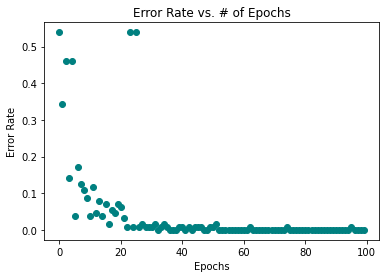

In [3]:
plt.scatter(index, errors, c = 'teal')
plt.title('Error Rate vs. # of Epochs')
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.show()

## c)

After cross validating over 60 epochs, we are unable to achieve perfect test accuracy.

[0.421875  0.3359375 0.3203125 0.3125    0.2734375 0.328125  0.3203125
 0.25      0.171875  0.203125  0.2890625 0.140625  0.15625   0.0703125
 0.15625   0.078125  0.1171875 0.078125  0.109375  0.109375  0.0703125
 0.1640625 0.078125  0.0703125 0.09375   0.0859375 0.0703125 0.0625
 0.03125   0.0546875 0.0546875 0.0703125 0.1484375 0.078125  0.078125
 0.0625    0.0703125 0.0546875 0.1328125 0.0390625 0.0546875 0.0703125
 0.046875  0.046875  0.0234375 0.0703125 0.0234375 0.0390625 0.0390625
 0.0390625 0.078125  0.015625  0.0234375 0.015625  0.046875  0.0234375
 0.0234375 0.0234375 0.046875  0.015625 ]


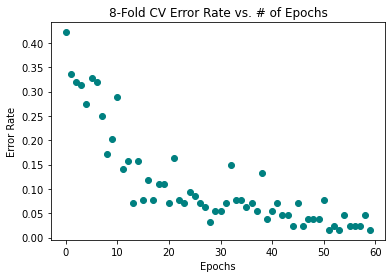

In [4]:
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']


y[y==-1] = 0  # use 0/1 for labels instead of -1/+1

it = 60
total_errors = np.zeros(it)
index = np.zeros(it)

for L in range (it):
    index[L] = L
    kf = KFold(n_splits=8)
    kf.get_n_splits(X)
    errors = np.zeros(8)
    #print(L)
    #print(kf)
    k = 0
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        n, p = np.shape(X_train)

        ## Train NN
        Xb = np.hstack((np.ones((n,1)), X_train))
        q = np.shape(y_train)[1] #number of classification problems
        M = 32 #number of hidden nodes

        ## initial weights
        V = np.random.randn(M+1, q); 
        W = np.random.randn(p+1, M);

        alpha = 0.05 #step size
        #L = 100 #number of epochs

        def logsig(_x):
            return 1/(1+np.exp(-_x))

        for epoch in range(L):
            ind = np.random.permutation(n)
            for i in ind:
                # Forward-propagate
                H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
                Yhat = logsig(H@V)
                 # Backpropagate
                delta = (Yhat-y_train[[i],:])*Yhat*(1-Yhat)
                Vnew = V-alpha*H.T@delta
                gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
                Wnew = W - alpha*Xb[[i],:].T@gamma
                V = Vnew
                W = Wnew

        ## Final predicted labels (on training data)
        n, p = np.shape(X_test)
        X_test = np.hstack((np.ones((n,1)), X_test))
        H = logsig(np.hstack((np.ones((n,1)), X_test@W)))
        Yhat = logsig(H@V)
        error = (np.sum(abs(np.round(Yhat[:,0])-y_test[:,0])))/y_test.size
        errors[k] = error
        k = k+1
        #print("\nError rate: ", error, "\n")

    total_errors[L] =  np.sum(errors)/8

print(total_errors)
plt.scatter(index, total_errors, c = 'teal')
plt.title('8-Fold CV Error Rate vs. # of Epochs')
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.show()